<a href="https://colab.research.google.com/github/vigneshsharma1997/Regression_Model/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

import numpy as s
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of 50_Startups.csv')

In [ ]:
len(dataset)

50

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.shape

(50, 5)

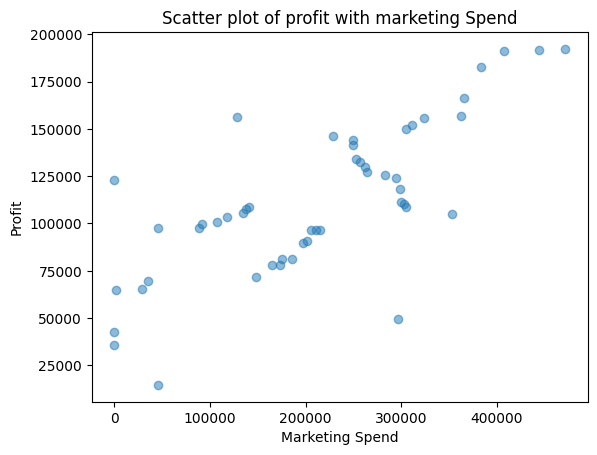

In [ ]:
# Marketing_Spend Vs Profit
plt.scatter(dataset['Marketing Spend'],dataset['Profit'] , alpha=0.5)
plt.title('Scatter plot of profit with marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

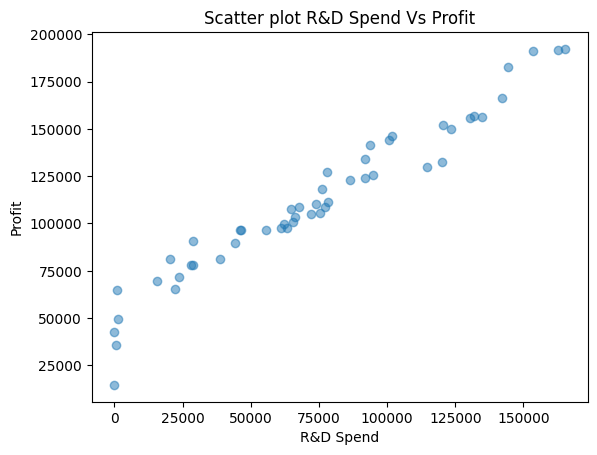

In [ ]:
# R&D Spend Vs Profit
plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha=0.5)
plt.title('Scatter plot R&D Spend Vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

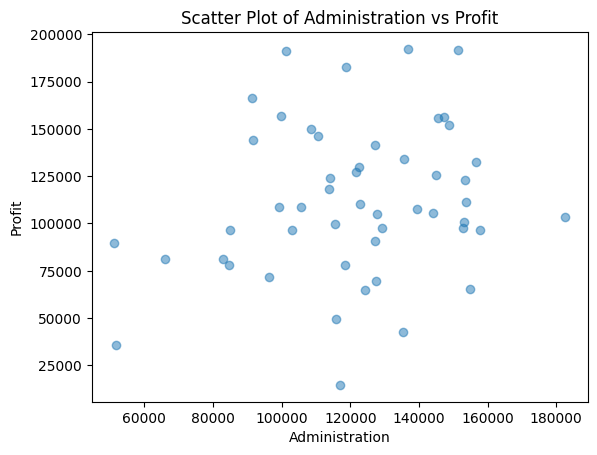

In [ ]:
# Administration Vs Profit
plt.scatter(dataset['Administration'],dataset['Profit'],alpha=0.5)
plt.title('Scatter Plot of Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

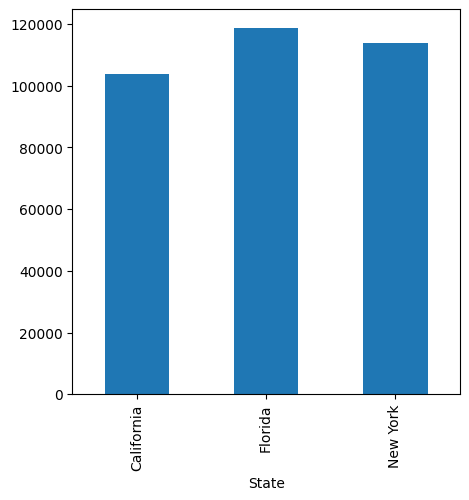

In [ ]:
#Create the figure object
 
ax = dataset.groupby(
['State'])['Profit'].mean().plot.bar(figsize = (5,5) ,fontsize = 10)


In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
#Create dummy variables for the categorical variable store
dataset['NewYork_State'] = np.where(dataset['State']=='New York',1,0)
dataset['California_State'] = np.where(dataset['State']=='California',1,0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida',1,0)

#Drop the original column state from the dataFrame
dataset.drop(columns=['State'],axis=1,inplace=True)


In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable = 'Profit'

In [ ]:
#Create a list of independant variables
independent_variables = list(set(dataset.columns.tolist()) - {dependant_variable})

In [ ]:
independent_variables

['Florida_State',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'R&D Spend',
 'California_State']

In [ ]:
# Create the data of independent variables

x = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [ ]:
dataset[independent_variables]

,Florida_State,Administration,Marketing Spend,NewYork_State,R&D Spend,California_State
0,0,136897.80,471784.10,1,165349.20,0
1,0,151377.59,443898.53,0,162597.70,1
2,1,101145.55,407934.54,0,153441.51,0
3,0,118671.85,383199.62,1,144372.41,0
4,1,91391.77,366168.42,0,142107.34,0
5,0,99814.71,362861.36,1,131876.90,0
6,0,147198.87,127716.82,0,134615.46,1
7,1,145530.06,323876.68,0,130298.13,0
8,0,148718.95,311613.29,1,120542.52,0
9,0,108679.17,304981.62,0,123334.88,1


In [ ]:
#Splitting dataset into the training and test set
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2,random_state=0)
x_train[0:10]


array([[1.0000000e+00, 1.0305749e+05, 2.1463481e+05, 0.0000000e+00,
        5.5493950e+04, 0.0000000e+00],
       [0.0000000e+00, 8.5047440e+04, 2.0551764e+05, 1.0000000e+00,
        4.6014020e+04, 0.0000000e+00],
       [1.0000000e+00, 1.4413598e+05, 1.3405007e+05, 0.0000000e+00,
        7.5328870e+04, 0.0000000e+00],
       [0.0000000e+00, 1.5769392e+05, 2.1079767e+05, 0.0000000e+00,
        4.6426070e+04, 1.0000000e+00],
       [1.0000000e+00, 1.1417579e+05, 2.9491957e+05, 0.0000000e+00,
        9.1749160e+04, 0.0000000e+00],
       [1.0000000e+00, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.3029813e+05, 0.0000000e+00],
       [1.0000000e+00, 1.5654742e+05, 2.5651292e+05, 0.0000000e+00,
        1.1994324e+05, 0.0000000e+00],
       [0.0000000e+00, 1.2415304e+05, 1.9039300e+03, 1.0000000e+00,
        1.0002300e+03, 0.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 0.0000000e+00, 1.0000000e+00,
        5.4205000e+02, 0.0000000e+00],
       [0.0000000e+00, 1.5303206e+05,

In [ ]:
x_test[0:10]

array([[1.0000000e+00, 1.8264556e+05, 1.1814820e+05, 0.0000000e+00,
        6.6051520e+04, 0.0000000e+00],
       [0.0000000e+00, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00,
        1.0067196e+05, 1.0000000e+00],
       [1.0000000e+00, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        1.0191308e+05, 0.0000000e+00],
       [1.0000000e+00, 8.4710770e+04, 1.6447071e+05, 0.0000000e+00,
        2.7892920e+04, 0.0000000e+00],
       [1.0000000e+00, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.5344151e+05, 0.0000000e+00],
       [0.0000000e+00, 1.2786455e+05, 3.5318381e+05, 1.0000000e+00,
        7.2107600e+04, 0.0000000e+00],
       [0.0000000e+00, 6.5947930e+04, 1.8526510e+05, 1.0000000e+00,
        2.0229590e+04, 0.0000000e+00],
       [0.0000000e+00, 1.5270192e+05, 8.8218230e+04, 1.0000000e+00,
        6.1136380e+04, 0.0000000e+00],
       [1.0000000e+00, 1.2278275e+05, 3.0331926e+05, 0.0000000e+00,
        7.3994560e+04, 0.0000000e+00],
       [1.0000000e+00, 9.1391770e+04,

In [ ]:
y_train[0:10]

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64])

In [ ]:
y_test[0:10]

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0:10]

array([[1.        , 0.48655174, 0.45494286, 0.        , 0.33561668,
        0.        ],
       [0.        , 0.3173015 , 0.43561799, 1.        , 0.2782839 ,
        0.        ],
       [1.        , 0.87258866, 0.28413435, 0.        , 0.45557444,
        0.        ],
       [0.        , 1.        , 0.44680961, 0.        , 0.2807759 ,
        1.        ],
       [1.        , 0.59103645, 0.62511553, 0.        , 0.55488118,
        0.        ],
       [1.        , 0.88568959, 0.68649342, 0.        , 0.7880179 ,
        0.        ],
       [1.        , 0.98922572, 0.54370828, 0.        , 0.72539353,
        0.        ],
       [0.        , 0.6847981 , 0.0040356 , 1.        , 0.0060492 ,
        0.        ],
       [0.        , 0.00432296, 0.        , 1.        , 0.00327821,
        0.        ],
       [0.        , 0.95618996, 0.22709197, 1.        , 0.39676926,
        0.        ]])

In [ ]:
#Fitting multiple linear regression to the training set

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

44153.95466784861

In [ ]:
regressor.coef_

array([-8.72645791e+02,  3.49927567e+03,  1.72720281e+04,  7.86007422e+02,
        1.27892182e+05,  8.66383692e+01])

In [ ]:
y_pred_train = regressor.predict(x_train)

In [ ]:
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [ ]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
#Predicting the test set results

y_pred_test = regressor.predict(x_test)

In [ ]:
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
#Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#Train Perfomance
math.sqrt(mean_squared_error(y_train,y_pred_train))

9031.666612578969

In [ ]:
#Test Performance
math.sqrt(mean_squared_error(y_test,y_pred_test))

9137.99015279494

In [ ]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test,y_pred_test)

0.9347068473282425